In [13]:
'''
1 (a)
'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
data = pd.read_csv('communities.csv', sep=",", header=None)

In [14]:
'''
1 (b)
'''
data.replace(to_replace="?", value=np.nan, inplace=True)
data = data.iloc[:,5:].astype("float64")
data = data.fillna(data.mean())
train_data = data.iloc[:1495, :]
test_data = data.iloc[1495:, :]


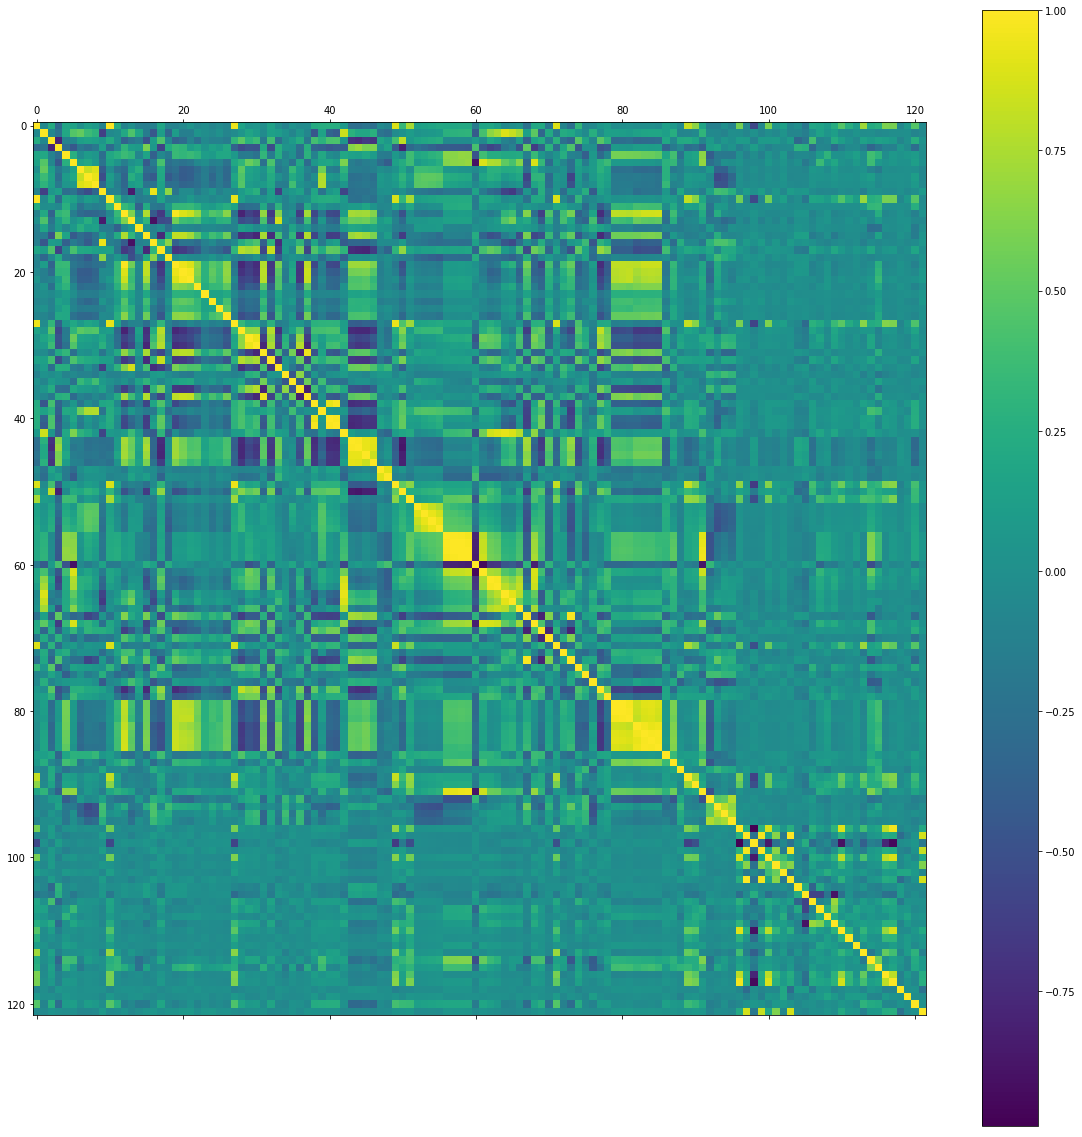

In [15]:
'''
1 (c)
'''
plt.figure(figsize=(20,20))

plt.matshow(data.iloc[:,:122].corr(),fignum=1)
plt.colorbar()

Coefficient of Variation for each feature are:
 5      2.203503
6      0.353298
7      1.410920
8      0.323782
9      1.359162
10     1.614278
11     0.365840
12     0.290693
13     0.495161
14     0.423442
15     2.001744
16     0.638849
17     0.579753
18     0.327710
19     0.700030
20     0.359240
21     0.368513
22     0.699031
23     0.349639
24     0.527732
25     0.545633
26     0.507552
27     0.589469
28     0.809685
29     0.606194
30     0.670645
31     0.473960
32     2.304970
33     0.753980
34     0.675600
         ...   
97     0.335575
98     0.338944
99     0.320105
100    0.304240
101    0.792743
102    0.293767
103    0.057126
104    0.251418
105    0.660058
106    0.305562
107    0.229206
108    0.293749
109    0.131417
110    0.121659
111    0.428076
112    0.581103
113    0.790655
114    0.347772
115    0.635284
116    0.145956
117    0.296183
118    1.678031
119    0.872187
120    1.416673
121    0.526001
122    0.730107
123    0.122331
124    0.368040
125    2

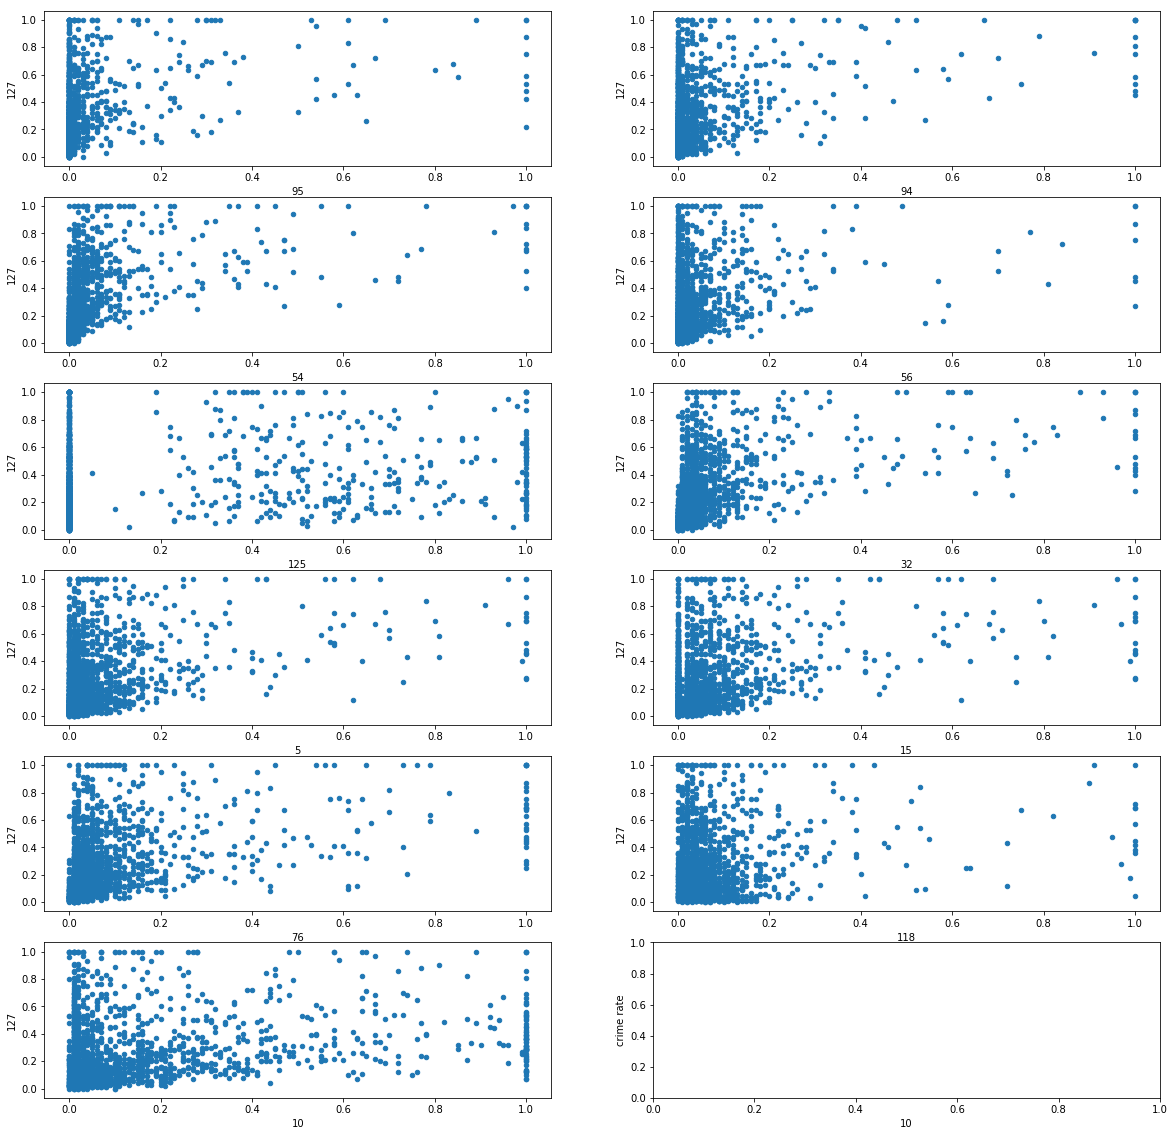

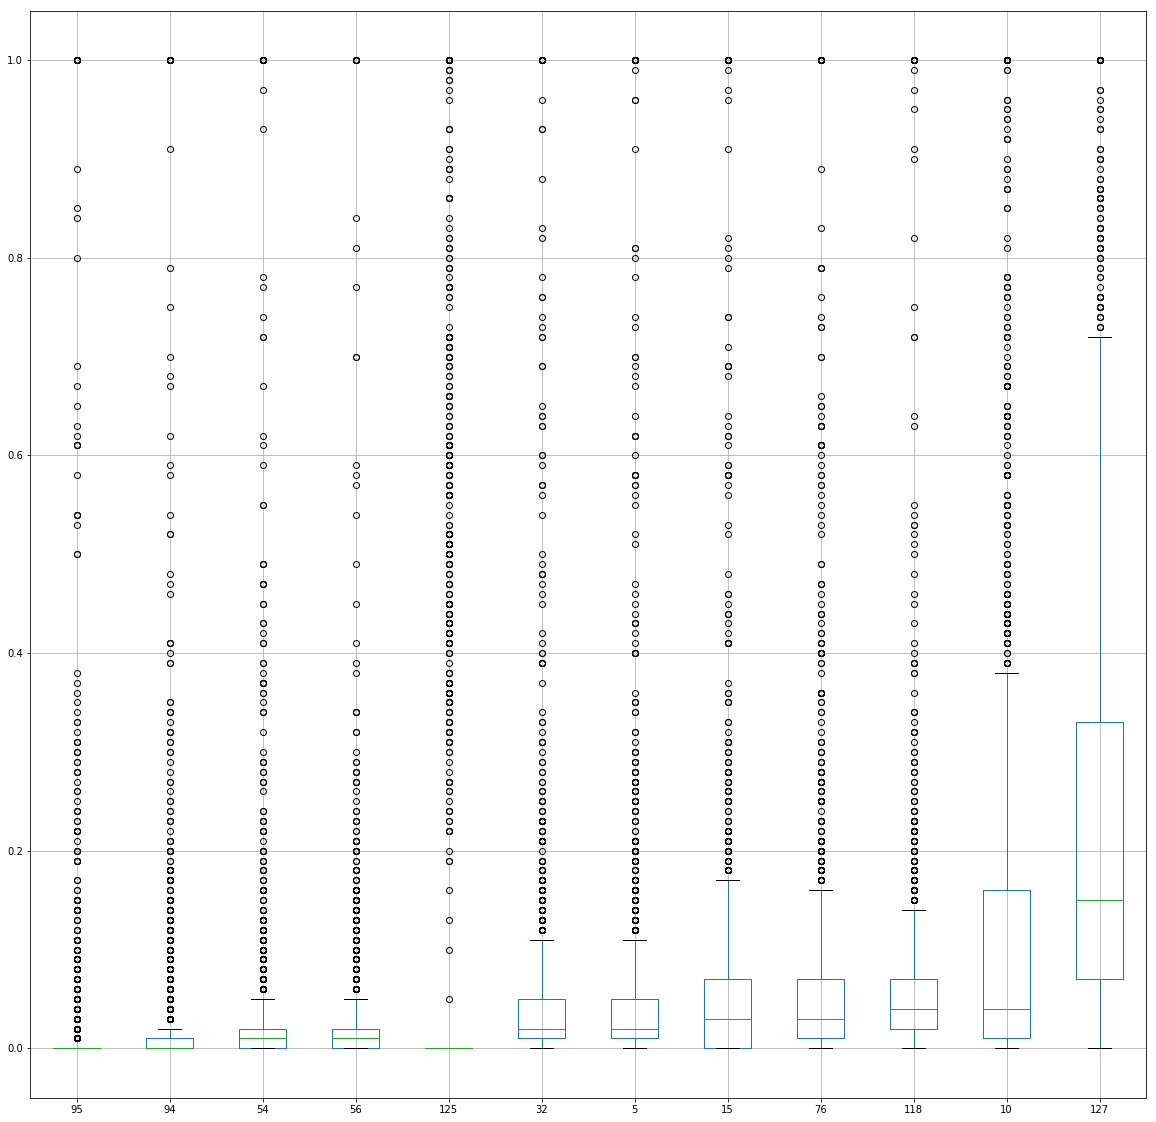

In [16]:
'''
1 (d), (e)
'''
import math
NUMBER_TO_SELECT = int(math.sqrt(128))
coefficient_of_variation = data.iloc[:,:122].std()/data.iloc[:,:122].mean()
print("Coefficient of Variation for each feature are:\n", coefficient_of_variation)
selected_feature_names = coefficient_of_variation.nlargest(NUMBER_TO_SELECT).index.values.tolist()
print("Top 11 highest CV have feature indexed:",selected_feature_names)
selected_feature_names.append(127)
number_of_subplot_rows = len(selected_feature_names)//2

selected_data = data[selected_feature_names]

fig, axes = plt.subplots(nrows=number_of_subplot_rows, ncols=2)
index = 0
for i in range(len(selected_feature_names)): 
    if(selected_feature_names[i] == 127):
        continue
    x_label = selected_feature_names[i]
    selected_data.plot(kind="scatter", x=x_label, y=127, ax = axes[int(index/2), index%2], figsize=(20,20))
    plt.xlabel(x_label) 
    plt.ylabel("crime rate")
    
    index += 1
plt.figure(figsize=(20, 20))
boxplot = selected_data.boxplot(column=selected_feature_names)

print("According to the scatter plots, there is a week relationship between each feature and the dependent varaiale")

In [17]:
'''
1 (f)
'''

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
np_train_features = train_data.iloc[:,:122].values
np_train_targets = train_data.iloc[:,122:].values.ravel()

np_test_features = test_data.iloc[:,0:122].values
np_test_targets = test_data.iloc[:,122:].values.ravel()

linear_reg = linear_model.LinearRegression()
linear_reg.fit(np_train_features, np_train_targets)
prediction = linear_reg.predict(np_test_features)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(np_test_targets, prediction))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(np_test_targets, prediction))


Mean squared error: 0.79
Variance score: -15.61


In [18]:
'''
1 (g)
'''
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000]).fit(np_train_features, np_train_targets)
prediction = ridge_reg.predict(np_test_features) 
mse = mean_squared_error(np_test_targets, prediction)
print("Best λ is:", 1/ridge_reg.alpha_, ", test mse is:",mse)

Best λ is: 1.0 , test mse is: 0.017737081104309094


In [19]:
'''
1 (h)
'''
import warnings
from sklearn.preprocessing import scale
from sklearn.linear_model import LassoCV
warnings.filterwarnings("ignore", category=Warning)
lasso_reg = LassoCV(alphas=[0.00001, 0.0001,0.001, 0.01, 0.1, 1, 10, 100]).fit(np_train_features, np_train_targets)

prediction = lasso_reg.predict(np_test_features)
mse = mean_squared_error(np_test_targets, prediction)

print("Lasso on normalized data\n\tBest λ is:", 1/lasso_reg.alpha_, ", test mse is:",mse)
selected_coefficients = []
for i in range (len(lasso_reg.coef_)):
    if lasso_reg.coef_[i] != 0 :
        selected_coefficients.append(i + 5)
print("\tCoefficients selected are:", selected_coefficients)

scaled_train_features = scale(train_data.iloc[:,:122])
scaled_test_features = scale(test_data.iloc[:,:122])
standardized_lasso_reg = LassoCV(alphas=[0.00001, 0.0001,0.001, 0.01, 0.1, 1, 10, 100]).fit(scaled_train_features, np_train_targets)
prediction = standardized_lasso_reg.predict(np_test_features)
standardized_mse = mean_squared_error(np_test_targets, prediction)
print("\nLasso on standardized data\n\tBest λ is:", 1/standardized_lasso_reg.alpha_, ", test mse is:",standardized_mse)
standardized_selected_coefficients = []
for i in range (len(standardized_lasso_reg.coef_)):
    if standardized_lasso_reg.coef_[i] != 0 :
        standardized_selected_coefficients.append(i + 5)
print ("\tCoefficients selected are:", standardized_selected_coefficients)

print("\nLasso on standardized data has higher mse:", standardized_mse, 
        "than Lasso on normalized data error rate:", mse)


Lasso on normalized data
	Best λ is: 10000.0 , test mse is: 0.017790185551932514
	Coefficients selected are: [7, 9, 11, 12, 14, 16, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 33, 34, 36, 38, 39, 41, 43, 44, 45, 49, 50, 51, 53, 54, 55, 56, 60, 64, 66, 68, 69, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 87, 90, 91, 92, 93, 94, 95, 96, 99, 104, 105, 107, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125]

Lasso on standardized data
	Best λ is: 1000.0 , test mse is: 0.03544803854635233
	Coefficients selected are: [7, 11, 12, 16, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 33, 34, 38, 39, 43, 44, 45, 49, 50, 51, 53, 54, 55, 56, 58, 64, 66, 68, 72, 73, 74, 76, 77, 79, 80, 81, 83, 87, 90, 91, 92, 93, 94, 95, 96, 99, 104, 105, 107, 109, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 123, 124]

Lasso on standardized data has higher mse: 0.03544803854635233 than Lasso on normalized data error rate: 0.017790185551932514


In [20]:
'''
1 (i)
'''
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

linear_reg = linear_model.LinearRegression()
min_mse = 1000
optimal_M = 0
for i in range (1, 123, 1): 
    pca = PCA(n_components=i)
    # 5 fold CV 
    kf = KFold(n_splits=5)
    total_mse = 0
    total_r2_score = 0
    for train_index, test_index in kf.split(np_train_features, np_train_targets):
        temp_train_reduced = pca.fit_transform(scale(np_train_features[train_index,:]))
        temp_test_reducted = pca.fit_transform(scale(np_train_features[test_index,:]))
        linear_reg.fit(temp_train_reduced, np_train_targets[np.array(train_index)])
    
        prediction = linear_reg.predict(temp_test_reducted)
        temp_r2_score = r2_score(np_train_targets[np.array(test_index)], prediction)
        temp_mse = mean_squared_error(np_train_targets[np.array(test_index)], prediction)
        total_r2_score += temp_r2_score
        total_mse += temp_mse
    avg_r2_score = total_r2_score/5
    avg_mse = total_mse/5
    if (avg_mse < min_mse):
        min_mse = avg_mse
        optimal_M = i   
    #print("\tavg_r2_score is:", avg_r2_score, "avg_mse is:", avg_mse)

print("best M is", optimal_M, ", best mse is",min_mse)

pca = PCA(n_components=optimal_M)
pca.fit(scale(np_train_features))
print("explained_variance_ratio : ", sum(pca.explained_variance_ratio_))
train_reduced = pca.transform(scale(np_train_features))
test_reduced = pca.transform(scale(np_test_features))

linear_reg.fit(train_reduced, np_train_targets)
prediction = linear_reg.predict(test_reduced)
r2_score = r2_score(np_test_targets, prediction)
mse = mean_squared_error(np_test_targets, prediction)
print("At optimal M, test mse is:", mse, " and r2 score is:",r2_score )

best M is 4 , best mse is 0.06452814971292756
explained_variance_ratio :  0.5107988904901056
At optimal M, test mse is: 0.02393109441027035  and r2 score is: 0.4967733540145012


In [21]:
'''
1 (j)
'''
import xgboost as xgb
#https://xgboost.readthedocs.io/en/latest///parameter.html#parameters-for-tree-booster
import os
#temp solve for kernel die 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
alphas = [0.00001, 0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000]

kf = KFold(n_splits=5)
best_alpha = 0 
best_mse = 100 
for i in range (len(alphas)): 
    xgb_model = xgb.XGBRegressor(booster="gblinear", reg_alpha=alphas[i])
    total_mse = 0
    for train_index, test_index in kf.split(np_train_features, np_train_targets):
        xgb_model.fit(np_train_features[train_index, :], np_train_targets[np.array(train_index)])
        prediction = xgb_model.predict(np_train_features[test_index, :])
        temp_mse = mean_squared_error(np_train_targets[np.array(test_index)], prediction)
        total_mse += temp_mse
    avg_mse = total_mse /5 
    print("At alpha:", alphas[i], "avg mse is:", avg_mse)
    if avg_mse < best_mse:
        best_mse = avg_mse
        best_alpha = alphas[i]
        
        
        
xgb_model = xgb.XGBRegressor(booster="gblinear", alpha=best_alpha)        

xgb_model.fit(np_train_features, np_train_targets)
prediction = xgb_model.predict(np_test_features)
mse = mean_squared_error(np_test_targets, prediction)
print("[OPTIMAL] At alpha:", best_alpha, "lowest avg mse is:", mse)

At alpha: 1e-05 avg mse is: 0.03339000315151265
At alpha: 0.0001 avg mse is: 0.033456067232709094
At alpha: 0.001 avg mse is: 0.03413193825007844
At alpha: 0.01 avg mse is: 0.04140011523658419
At alpha: 0.1 avg mse is: 0.05649929720160261
At alpha: 1 avg mse is: 0.056499512096278
At alpha: 10 avg mse is: 0.056499512096278
At alpha: 100 avg mse is: 0.056499512096278
At alpha: 1000 avg mse is: 0.056499512096278
[OPTIMAL] At alpha: 1e-05 lowest avg mse is: 0.028035431920327536


In [25]:
'''
2 (a)
'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
train_data = pd.read_csv('aps_failure_training_set.csv', skiprows=20, header=0)
test_data = pd.read_csv('aps_failure_test_set.csv', skiprows=20, header=0)


In [26]:
'''
2 b (i)
'''
train_data.replace(to_replace="na", value=np.nan, inplace=True)
train_data.replace(to_replace="neg", value=0, inplace=True)
train_data.replace(to_replace="pos", value=1, inplace=True)
train_data.iloc[:,1:] = train_data.iloc[:,1:].astype("float32")
train_data = train_data.fillna(train_data.mean())

In [27]:
'''
2 b(ii) 
'''
train_data.to_csv("train_data.csv")
coefficient_of_variation = train_data.iloc[:,1:].var()/train_data.iloc[:,1:].mean()
print("coefficient_of_variation is", coefficient_of_variation)

coefficient_of_variation is aa_000    3.564072e+05
ab_000    3.865941e+00
ac_000    1.675693e+09
ad_000    6.443828e+09
ae_000    3.664941e+03
af_000    3.830504e+03
ag_000    1.870770e+06
ag_001    1.184630e+06
ag_002    2.597812e+06
ag_003    6.480150e+06
ag_004    1.275470e+07
ag_005    9.497051e+06
ag_006    9.116826e+06
ag_007    4.008718e+06
ag_008    1.347106e+06
ag_009    5.561367e+06
ah_000    9.576575e+06
ai_000    2.926500e+06
aj_000    2.193560e+06
ak_000    5.439346e+06
al_000    4.868308e+06
am_0      7.654373e+06
an_000    1.734646e+07
ao_000    1.533719e+07
ap_000    9.397491e+06
aq_000    3.567425e+06
ar_000    5.836538e+01
as_000    9.463398e+05
at_000    2.790320e+06
au_000    1.071038e+06
              ...     
dl_000    3.923288e+07
dm_000    9.065438e+06
dn_000    2.775356e+05
do_000    1.256181e+05
dp_000    2.671293e+04
dq_000    2.003949e+09
dr_000    8.746503e+06
ds_000    4.615706e+05
dt_000    7.080082e+04
du_000    3.147529e+07
dv_000    6.975060e+06
dx_000

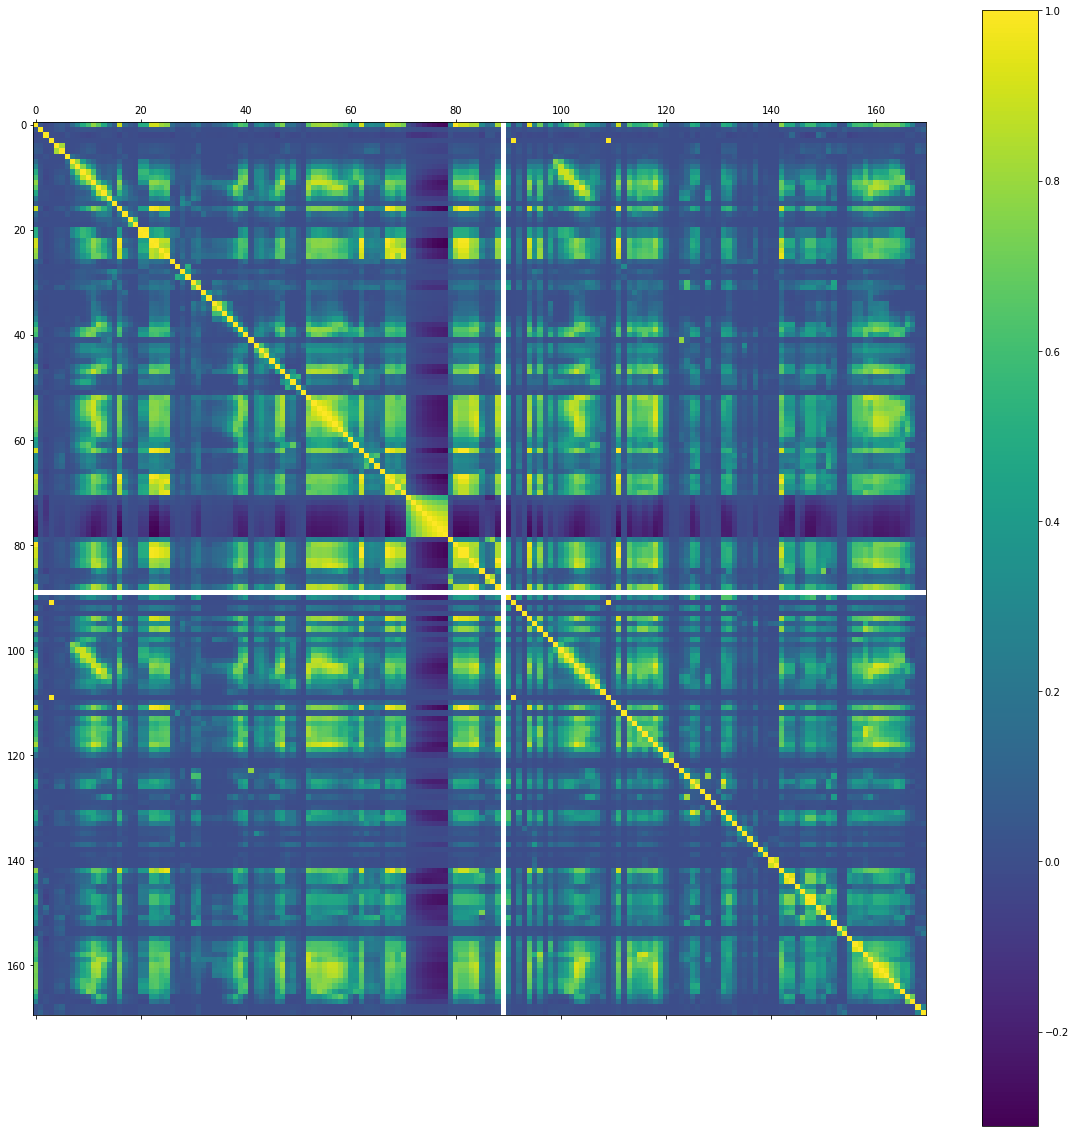

In [28]:
'''
2 b(iii)
'''
plt.figure(figsize=(20,20))

plt.matshow(train_data.iloc[:,1:].corr(),fignum=1)
plt.colorbar()

['cf_000', 'co_000', 'ad_000', 'dq_000', 'ac_000', 'eb_000', 'dh_000', 'cs_009', 'dl_000', 'du_000', 'ay_001', 'bb_000', 'bu_000']


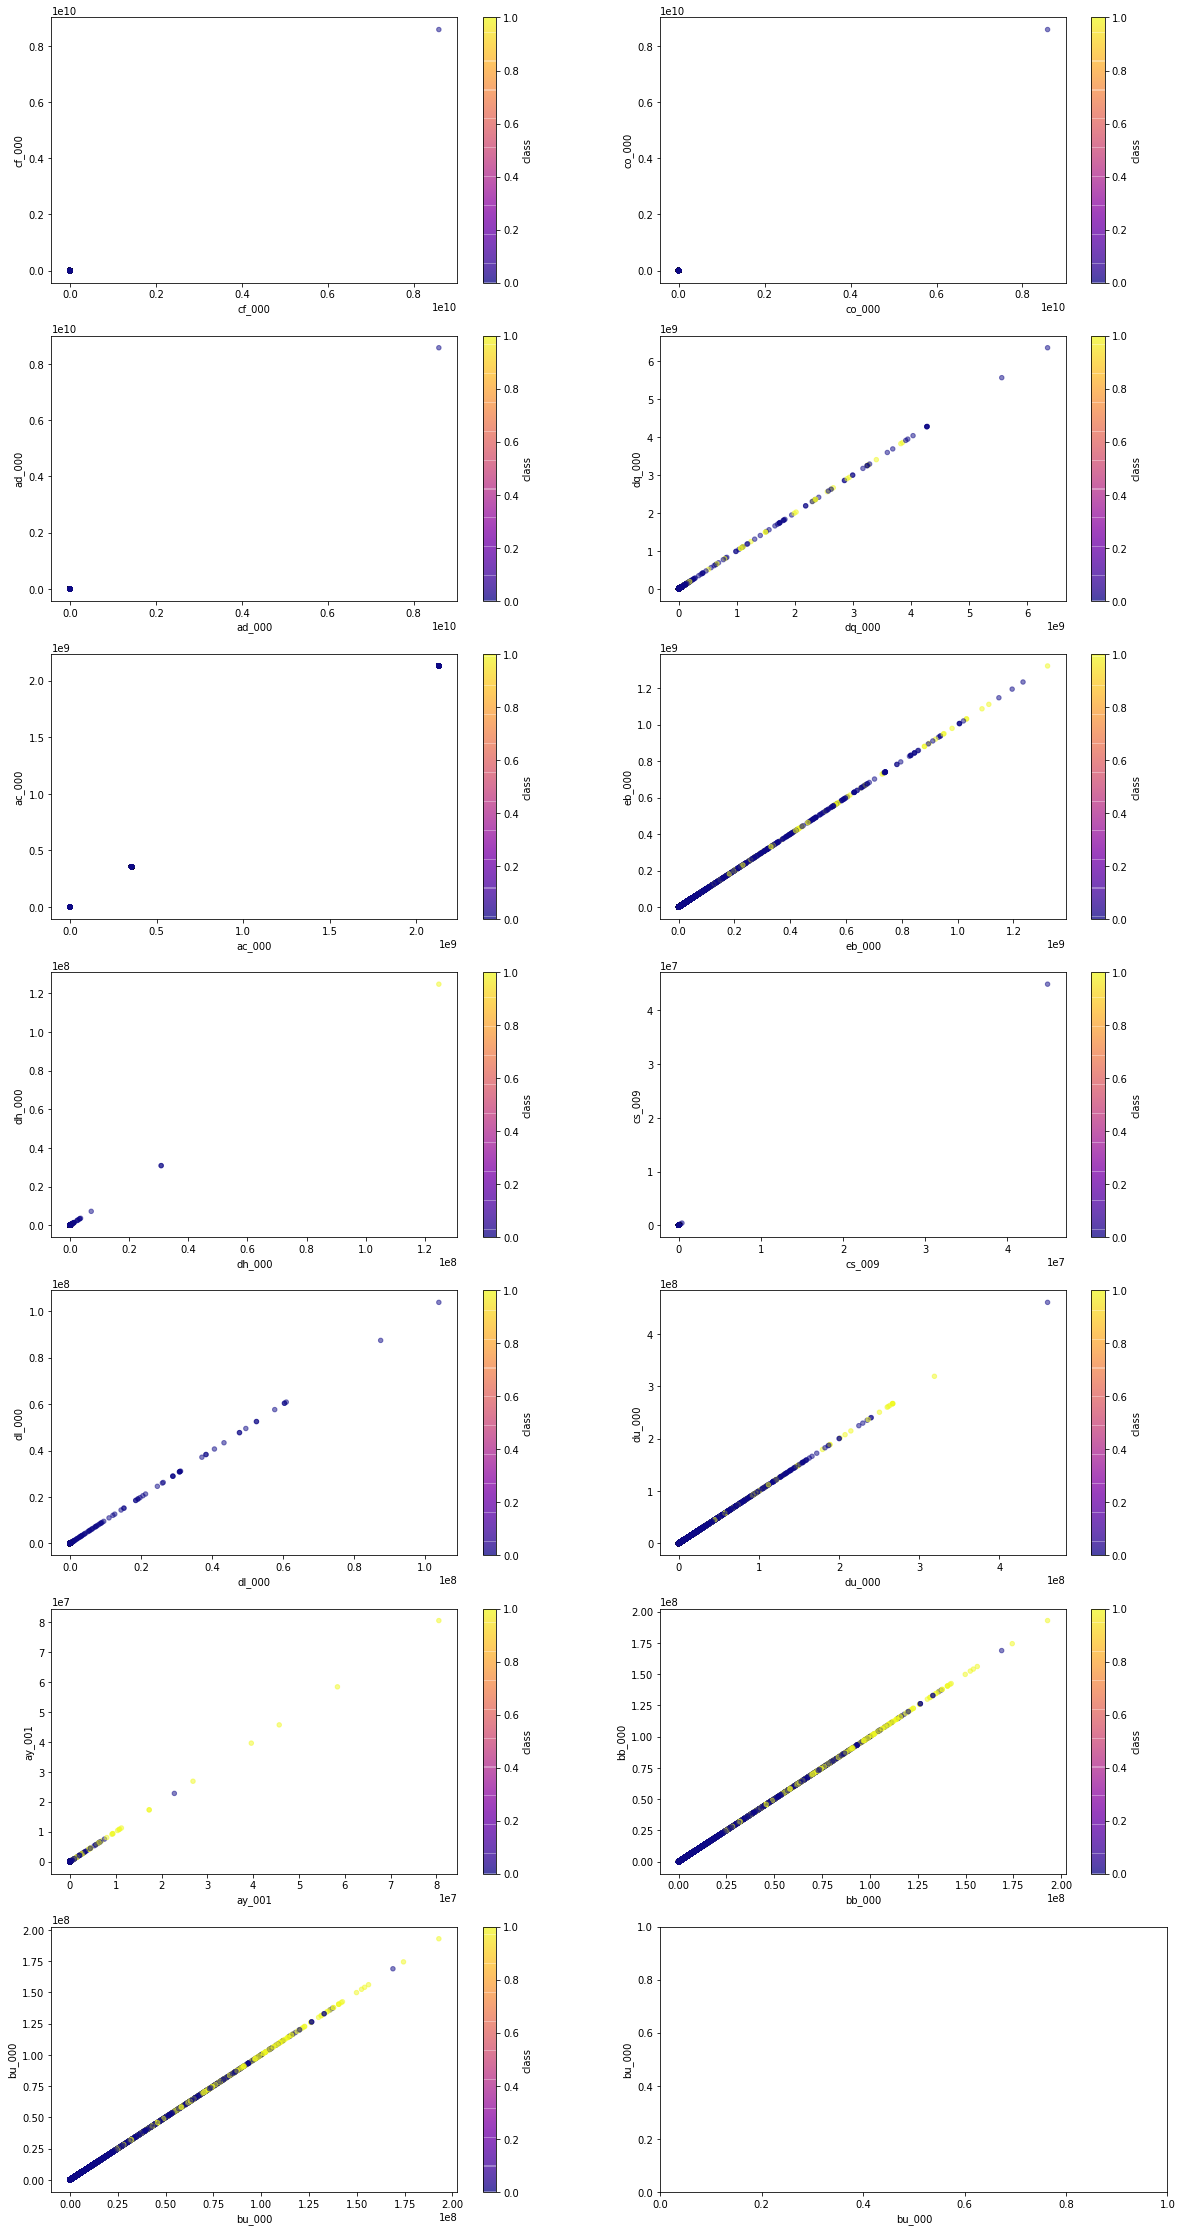

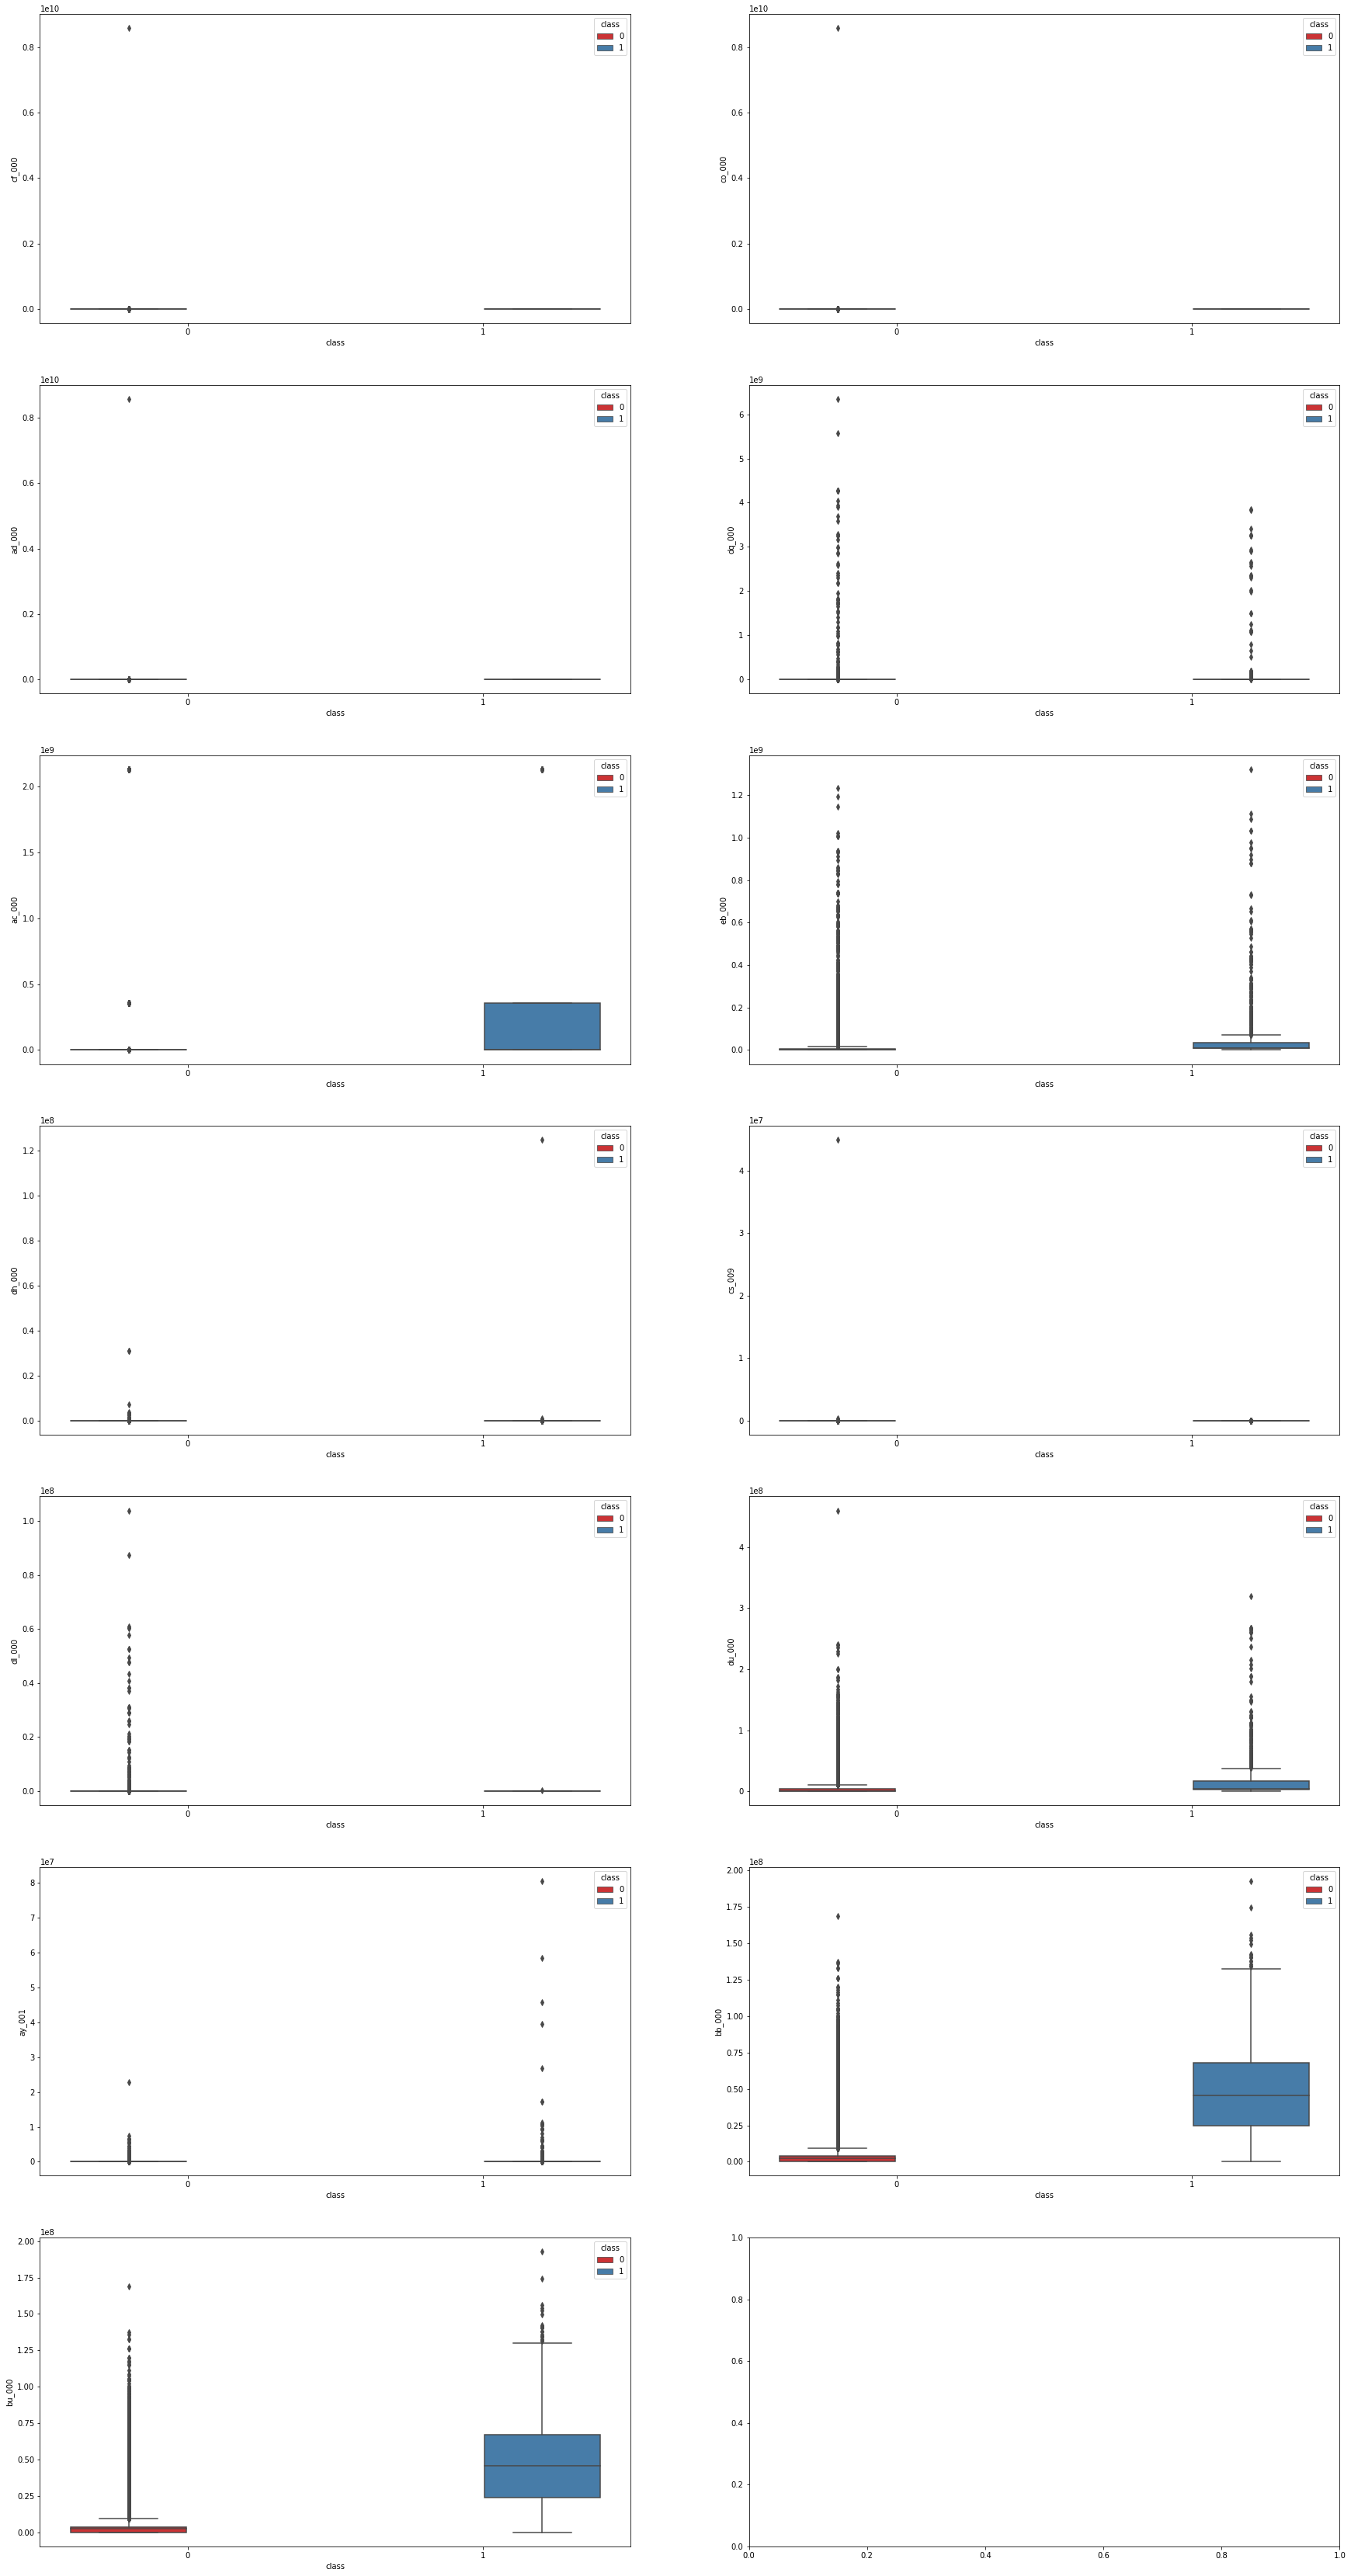

In [29]:
'''
2 b(iv)
'''
import math
selected_feature_names = coefficient_of_variation.nlargest(int(math.sqrt(170))).index.values.tolist()
print(selected_feature_names)
selected_feature_names.append("class")
number_of_subplot_rows = len(selected_feature_names)//2

selected_data = train_data[selected_feature_names]
selected_feature_names.pop()

fig, axes = plt.subplots(nrows=number_of_subplot_rows, ncols=2, figsize=(20,40))
index = 0
# Time consuming 
# for i in range(len(selected_feature_names) - 1):
#     for j in range(i+1, len(selected_feature_names)): 
#         x_label = selected_feature_names[i]
#         y_label = selected_feature_names[j]
#         selected_data.plot(kind="scatter", x=x_label, y=y_label, c="class", alpha=0.5,
#                            colormap='plasma', ax = axes[int(index/2), index%2], figsize=(20,20))
#         plt.xlabel(x_label) 
#         plt.ylabel(y_label)
#         index += 1

for i in range(len(selected_feature_names)):
        x_label = selected_feature_names[i]
        selected_data.plot(kind="scatter", x=x_label, y=x_label, c="class", alpha = 0.5, 
                        colormap='plasma', ax = axes[int(index/2), index%2])
        plt.xlabel(x_label) 
        plt.ylabel(x_label)
        index += 1
        
        
fig, axes = plt.subplots(nrows=number_of_subplot_rows, ncols=2, figsize=(30,60))
for i in range(len(selected_feature_names)):
    sns.boxplot(x="class", y=selected_feature_names[i], hue="class", data=selected_data, 
                palette="Set1", ax=axes[int(i/2), i%2])
# plt.figure(figsize=(20, 20))
# boxplot = selected_data.boxplot(column=selected_feature_names)

In [30]:
'''
2 b (iv) continue
'''
print("Some of the features are significant beacuse we can see trends such that when x increases\
     one class(color) appear more often than the other class(color)")

Some of the features are significant beacuse we can see trends such that when x increases     one class(color) appear more often than the other class(color)


In [31]:
'''
2 b (v)
'''
print(train_data["class"].value_counts())
#the classes are imbalance 

0    59000
1     1000
Name: class, dtype: int64


In [32]:
'''
2 (c)
'''
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=2, oob_score=True)

np_train_features = train_data.iloc[:,1:].values
np_train_targets = train_data.iloc[:,:1].values.ravel()

#clean test data set 
test_data.replace(to_replace="na", value=np.nan, inplace=True)
test_data.replace(to_replace="neg", value=0, inplace=True)
test_data.replace(to_replace="pos", value=1, inplace=True)
test_data.iloc[:,1:] = test_data.iloc[:,1:].astype("float32")
test_data = test_data.fillna(test_data.mean())

np_test_features = test_data.iloc[:,1:].values
np_test_targets = test_data.iloc[:,:1].values.ravel()

random_forest.fit(np_train_features, np_train_targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

train data confusion matrix:
 [[58989    11]
 [  828   172]]


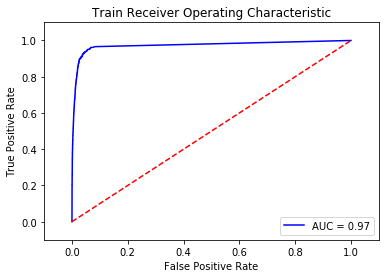

test data confusion matrix:
 [[15624     1]
 [  308    67]]


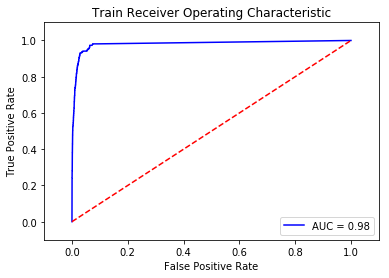

Out of bag score on trainin set is: 0.014183333333333326 test error is: 0.019312499999999955


In [33]:
'''
2 (c) continue
'''
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#train CM, ROC, AUC 
train_pred = random_forest.predict(np_train_features)
print('train data confusion matrix:\n', confusion_matrix(np_train_targets, train_pred))
probs = random_forest.predict_proba(np_train_features)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(np_train_targets, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Train Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#test CM, ROC, AUC 
test_pred = random_forest.predict(np_test_features)
print('test data confusion matrix:\n', confusion_matrix(np_test_targets, test_pred))
probs = random_forest.predict_proba(np_test_features)
preds = probs[:,1]
plt.figure()
fpr, tpr, threshold = metrics.roc_curve(np_test_targets, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Train Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



print ("Out of bag score on trainin set is:", 1-random_forest.oob_score_, 
       "test error is:", 1 - random_forest.score(np_test_features, np_test_targets))

train data confusion matrix:
 [[55249  3751]
 [   50   950]]


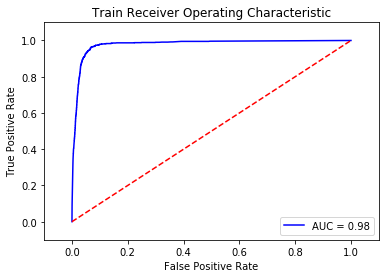

test data confusion matrix:
 [[14682   943]
 [   13   362]]


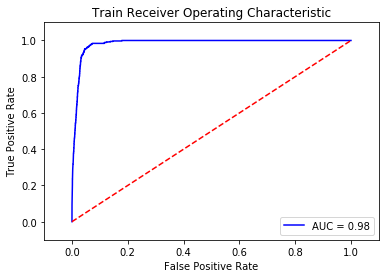

Out of bag score on trainin set is: 0.0637833333333333 test error is: 0.05974999999999997
The more balanced data trained a model with higher total error rate comparing to that trained by imbalanced model; however balanced model has lower error rate in positive class, and higher error rate in negative class, total error rate increases as a result of making more true negative classification errors.


In [36]:
'''
2 (d)
'''
'There are two common approaches to tackle the problem of extremely imbalanced data. \
One is based on cost sensitive learning: assigning a high cost to misclassification of the minority class \
and trying to minimize the overall cost. \
https://statistics.berkeley.edu/sites/default/files/tech-reports/666.pdf'


random_forest = RandomForestClassifier(n_estimators=100, max_depth=2, oob_score=True, class_weight="balanced")

random_forest.fit(np_train_features, np_train_targets)

#train CM, ROC, AUC 
train_pred = random_forest.predict(np_train_features)
print('train data confusion matrix:\n', confusion_matrix(np_train_targets, train_pred))
probs = random_forest.predict_proba(np_train_features)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(np_train_targets, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Train Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#test CM, ROC, AUC 
test_pred = random_forest.predict(np_test_features)
print('test data confusion matrix:\n', confusion_matrix(np_test_targets, test_pred))
probs = random_forest.predict_proba(np_test_features)
preds = probs[:,1]
plt.figure()
fpr, tpr, threshold = metrics.roc_curve(np_test_targets, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Train Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print ("Out of bag score on trainin set is:", 1-random_forest.oob_score_, 
       "test error is:", 1 - random_forest.score(np_test_features, np_test_targets))
print("The more balanced data trained a model with higher total error rate comparing to that \
trained by imbalanced model; however balanced model has lower error rate in positive class, and higher \
error rate in negative class, total error rate increases as a \
result of making more true negative classification errors.")


In [16]:
'''
2 (e)
Generate train and test data in the format that can be parsed by weka.
'''
train_data_out = pd.read_csv('aps_failure_training_set.csv', skiprows=20, header=0)
train_data_out.replace(to_replace="na", value=np.nan, inplace=True)
train_data_out.iloc[:,1:] = train_data_out.iloc[:,1:].astype("float32")
train_data_out = train_data_out.fillna(train_data_out.mean())
train_data_out.to_csv("train_data.csv", index=False)

test_data_out = pd.read_csv('aps_failure_test_set.csv', skiprows=20, header=0)
test_data_out.replace(to_replace="na", value=np.nan, inplace=True)
test_data_out.iloc[:,1:] = test_data_out.iloc[:,1:].astype("float32")
test_data_out = test_data_out.fillna(test_data_out.mean())
test_data_out.to_csv("test_data.csv", index=False)